In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:05<00:00, 29652203.60it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
image, _ = trainset[0]
print (image)

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

In [ ]:
batch_size = 4

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [ ]:
for images, labels in trainloader:
  print (images.shape)
  print (labels)
  break

torch.Size([4, 3, 32, 32])
tensor([7, 8, 1, 8])


In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


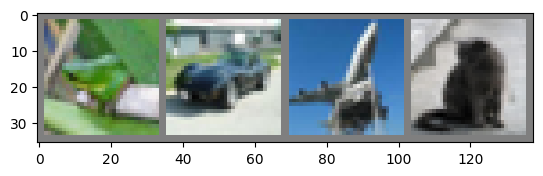

frog
car
plane
cat


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(classes[labels[0]])
print (classes[labels[1]])
print (classes[labels[2]])
print (classes[labels[3]])

In [ ]:
class MyCNN(nn.Module):
    def __init__(self, num_classes=1000):
        super(MyCNN, self).__init__()

        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),


            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),


            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),


            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(512 , 128),

            nn.Dropout(),
            nn.Linear(128, 32),

            nn.Dropout(),
            nn.Linear(32, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Create the MyCNN model
net = MyCNN(num_classes=10).to(device)

Using device: cuda


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):  # making it run for 2 epochs

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a tuple of (inputs, labels)
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1, 2000] loss: 2.303
[1, 4000] loss: 2.210
[1, 6000] loss: 1.980
[1, 8000] loss: 1.809
[1, 10000] loss: 1.709
[1, 12000] loss: 1.591
[2, 2000] loss: 1.485
[2, 4000] loss: 1.413
[2, 6000] loss: 1.354
[2, 8000] loss: 1.321
[2, 10000] loss: 1.272
[2, 12000] loss: 1.221
[3, 2000] loss: 1.123
[3, 4000] loss: 1.105
[3, 6000] loss: 1.083
[3, 8000] loss: 1.051
[3, 10000] loss: 1.008
[3, 12000] loss: 0.997
[4, 2000] loss: 0.882
[4, 4000] loss: 0.871
[4, 6000] loss: 0.905
[4, 8000] loss: 0.852
[4, 10000] loss: 0.881
[4, 12000] loss: 0.833
[5, 2000] loss: 0.735
[5, 4000] loss: 0.711
[5, 6000] loss: 0.724
[5, 8000] loss: 0.720
[5, 10000] loss: 0.728
[5, 12000] loss: 0.715
[6, 2000] loss: 0.593
[6, 4000] loss: 0.602
[6, 6000] loss: 0.613
[6, 8000] loss: 0.621
[6, 10000] loss: 0.625
[6, 12000] loss: 0.619
[7, 2000] loss: 0.464
[7, 4000] loss: 0.496
[7, 6000] loss: 0.498
[7, 8000] loss: 0.556
[7, 10000] loss: 0.533
[7, 12000] loss: 0.540
[8, 2000] loss: 0.372
[8, 4000] loss: 0.437
[8, 6000] loss: 0.

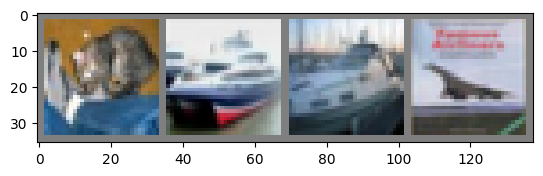

Groundtruth values are:
cat
ship
ship
plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print ('Groundtruth values are:')
for i in range (4):
  print (classes[labels[i]])

In [ ]:
outputs = net(images.to(device))

In [ ]:
print (outputs)

tensor([[ -3.4526,  -1.8453,   1.2795,   5.9379,  -2.4330,   5.4341,   2.2200,
          -2.7587,  -1.4390,  -3.1927],
        [  8.3949,  17.5015,  -0.8003,  -7.9175, -22.1741, -18.3657,  -5.1066,
         -20.9567,  27.6320,   5.4174],
        [  1.4116,   4.8907,  -3.8409,   0.4748,  -5.6640,  -3.5395,  -0.6683,
          -4.8779,   6.1302,   4.7339],
        [ 10.5244,   2.5182,  -0.2191,  -2.4477,  -6.0575,  -6.5855,  -4.8592,
          -8.4570,  12.5450,   2.4210]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [ ]:
_, indices = torch.max(outputs, 1)
print (indices)
indices = list(indices)

tensor([3, 8, 8, 8], device='cuda:0')


In [ ]:
print ('predictions are:')
for i in range (4):
    print (f"{i}) : {classes[indices[i]]}")

predictions are:
0) : cat
1) : ship
2) : ship
3) : ship


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 76 %
